In [5]:
import os
import pandas as pd
import warnings
import sys
sys.path.insert(0, '..') #sys allows for the .ipynb file to connect to the shared folder files
from shared_scripts import Hindcast_Initialization, FigureDeveloper
import hydroeval as he
import sklearn
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

#Set working directories
cwd = os.getcwd() 
datapath = f"{os.path.expanduser('~')}/SWEML"
warnings.filterwarnings("ignore")

In [6]:
import importlib
importlib.reload(FigureDeveloper)

<module 'shared_scripts.FigureDeveloper' from '/home/rjohnson18/SWEML/Model/Neural_Network/../shared_scripts/FigureDeveloper.py'>

In [7]:
#Get datetime and corresponding background information to evaluate hindcast
#Need to load predictions2022-09-24.h5, 2019_predictions.h5 (if straight to here and did not make predictions)  

new_year = '2019'
threshold = '10.0'
Region_list = [ 'N_Sierras', 'S_Sierras_High', 'S_Sierras_Low','Greater_Yellowstone', 
     'N_Co_Rockies', 'SW_Mont', 'SW_Co_Rockies', 'GBasin', 'N_Wasatch', 'N_Cascade',
     'S_Wasatch', 'SW_Mtns', 'E_WA_N_Id_W_Mont', 'S_Wyoming', 'SE_Co_Rockies', 
     'Sawtooth', 'Ca_Coast', 'E_Or', 'N_Yellowstone', 'S_Cascade', 'Wa_Coast',
     'Greater_Glacier', 'Or_Coast'
              ]

Maritime_Region = ['S_Sierras_High','S_Sierras_Low', 'N_Sierras','S_Cascade',
                      'N_Cascade', 'Ca_Coast', 'Wa_Coast', 
                      'Or_Coast']

Prairie_Region  =  ['N_Yellowstone','SW_Mont', 'GBasin', 'S_Wasatch', 'Sawtooth', 'SW_Mtns']

Alpine_Region =['E_Or', 'N_Wasatch', 'E_WA_N_Id_W_Mont', 'Greater_Yellowstone', 'N_Co_Rockies','S_Wyoming', 'SW_Co_Rockies',
                        'Greater_Glacier', 'SE_Co_Rockies']
model = 'Neural_Network'
frequency = 'Daily'
fSCA = True

#if using daily, 345 locations from ASO not included in training data.
datelist = Hindcast_Initialization.Hindcast_Initialization(cwd, datapath, new_year, threshold, Region_list, frequency, fSCA = fSCA)
#EvalDF, missingsites = Hindcast_Initialization.HindCast_DataProcess(datelist,Region_list, cwd, datapath, model, frequency, fSCA = fSCA)

Creating files for a historical simulation within  'N_Sierras', 'S_Sierras_High', 'S_Sierras_Low', 'Greater_Yellowstone', 'N_Co_Rockies', 'SW_Mont', 'SW_Co_Rockies', 'GBasin', 'N_Wasatch', 'N_Cascade', 'S_Wasatch', 'SW_Mtns', 'E_WA_N_Id_W_Mont', 'S_Wyoming', 'SE_Co_Rockies', 'Sawtooth', 'Ca_Coast', 'E_Or', 'N_Yellowstone', 'S_Cascade', 'Wa_Coast', 'Greater_Glacier', 'Or_Coast'  regions for water year  2019


In [8]:
EvalDF, missingsites = Hindcast_Initialization.HindCast_DataProcess(datelist,Region_list, cwd, datapath, model, frequency, fSCA = fSCA)

Getting prediction files
Site data processing complete, setting up prediction dataframes...
Finalizing Evaluation dataframes...
There were  0  sites missing from the prediction dataset occuring on  []


In [9]:
#Daily
FigureDeveloper.Peak_SWE(datelist, EvalDF, Region_list)

,ObsMax,PredMax,ObsMaxDate,PredMaxDate
Region,,,,
Northern Sierra Nevada,139.107333,141.988505,2019-04-02,2019-04-09
Southern Sierra Nevada High,133.996545,158.959299,2019-04-09,2019-04-02
Southern Sierra Nevada Low,100.838,73.958553,2019-03-26,2019-03-12
Greater Yellowstone,30.674235,28.397977,2019-04-16,2019-04-09
Upper Colorado Rockies,51.107474,49.859799,2019-04-16,2019-03-26
SW Montana,46.0756,52.368233,2019-04-16,2019-02-26
San Juan Mountains,55.372,54.444687,2019-04-02,2019-04-16
Great Basin,46.455263,67.514982,2019-03-26,2019-04-16
Northern Wasatch,61.896625,64.021068,2019-04-16,2019-04-16


In [10]:
#Daily
Model_Results = FigureDeveloper.Dict_2_DF(EvalDF, Region_list)
Model_Results.head()

,y_test,y_pred,Region,Date,Long,Lat,elevation_m,WYWeek,northness,VIIRS_SCA,hasSnow,y_pred_fSCA,error
00c4db22-a423-41a4-ada6-a8b1b04153a4,6.858,8.751603,Northern Sierra Nevada,2018-12-11,-121.939413,41.166647,1661.50,10.0,-0.167901,55.500000,True,8.751603,-1.893603
018cf1a1-f945-4097-9c47-0c4690538bb5,17.780,14.496857,Northern Sierra Nevada,2018-12-11,-120.618890,39.675880,2057.50,10.0,-0.006909,55.500000,True,14.496857,3.283143
147d5eb4-e574-47e4-994a-8a2908c06050,11.176,13.114109,Northern Sierra Nevada,2018-12-11,-120.879401,39.786417,2013.00,10.0,0.011996,70.166667,True,13.114109,-1.938109
6dd37e24-0a9c-4749-8ab6-7e26d42925d6,10.160,8.271645,Northern Sierra Nevada,2018-12-11,-121.786700,40.780052,1787.00,10.0,-0.191108,56.500000,True,8.271645,1.888355
76b55900-eb3d-4d25-a538-f74302ffe72d,15.494,22.674377,Northern Sierra Nevada,2018-12-11,-120.178716,41.993149,2261.25,10.0,0.039906,100.000000,True,22.674377,-7.180377


# Daily

In [11]:
#put all regions together for basic metrics
allregions = pd.DataFrame()
for region in EvalDF.keys():
    allregions = pd.concat([allregions, EvalDF[region]])
    
y_pred = allregions['y_pred_fSCA']
y_test = allregions['y_test']
    
kge, r, alpha, beta = he.evaluator(he.kge, y_pred, y_test)
rmse = sklearn.metrics.mean_squared_error(y_test, y_pred, squared = False)
pbias = he.evaluator(he.pbias, y_pred, y_test)


print('There are ', len(allregions), ' hindcast evaluation obs')
print('All regions KGE is: ', kge[0])
print('All regions rmse is: ', rmse)
print('All regions pbias is: ', pbias[0])

There are  6221  hindcast evaluation obs
All regions KGE is:  0.8650223530045853
All regions rmse is:  16.791928127113795
All regions pbias is:  0.44280379105067424


In [12]:
#Daily
Maritime_Region, Prairie_Region, Alpine_Region, Snow_Class = FigureDeveloper.Sturm_Classified_Performance(Model_Results)

Maritime  RMSE:  23.716762795001433  R2:  0.7413766827775519 pbias: [1.26075521] KGE:  0.8711730704512681
Alpine  RMSE:  12.25984644315315  R2:  0.7131803752996227 pbias: [3.72112885] KGE:  0.8099224774440513
Prairie  RMSE:  12.8906410934099  R2:  0.653717121298808 pbias: [-6.17242501] KGE:  0.8208554136593839


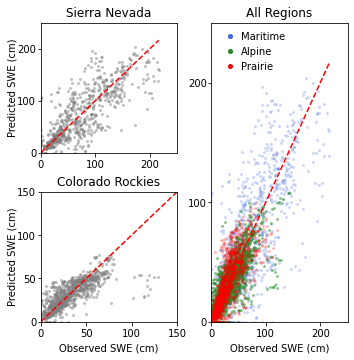

In [13]:
#Daily
FigureDeveloper.Slurm_Class_parity(Model_Results, Maritime_Region, Prairie_Region, Alpine_Region, frequency)

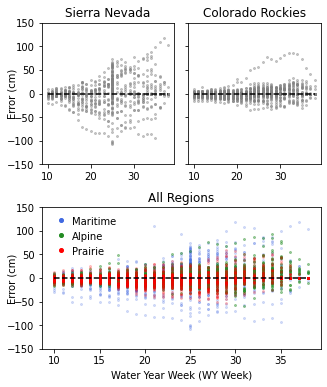

In [14]:
#Daily
FigureDeveloper.EvalPlots3(Model_Results, Maritime_Region, Prairie_Region, Alpine_Region, 'WYWeek', 'error', 'Water Year Week (WY Week)', 'Error (cm)', 'ErrorVsWYWeek', 2, frequency)

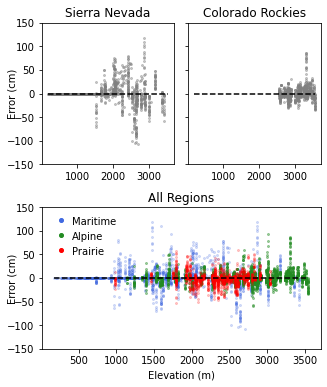

In [15]:
#Daily
FigureDeveloper.EvalPlots3(Model_Results, Maritime_Region, Prairie_Region, Alpine_Region,'elevation_m', 'error', 'Elevation (m)', 'Error (cm)', 'ErrorVsElevation', 2, frequency)

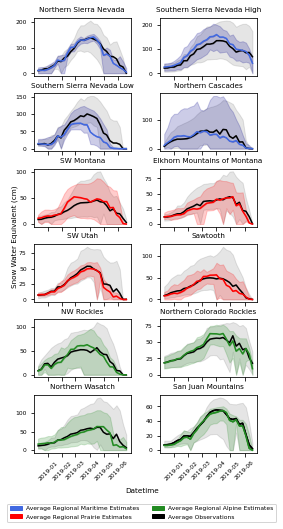

In [16]:
#Daily

Maritime_Region = ['S_Sierras_High','S_Sierras_Low', 'N_Sierras','S_Cascade',
                      'N_Cascade', 'Ca_Coast', 'Wa_Coast', 
                      'Or_Coast']

Prairie_Region  =  ['N_Yellowstone','SW_Mont', 'GBasin', 'S_Wasatch', 'Sawtooth', 'SW_Mtns']

Alpine_Region =['E_Or', 'N_Wasatch', 'E_WA_N_Id_W_Mont', 'Greater_Yellowstone', 'N_Co_Rockies','S_Wyoming', 'SW_Co_Rockies',
                        'Greater_Glacier', 'SE_Co_Rockies']


importlib.reload(FigureDeveloper)

Maritime = [ 'N_Sierras', 'S_Sierras_High', 'S_Sierras_Low','N_Cascade']
Prarie = [ 'SW_Mont', 'N_Yellowstone', 'S_Wasatch','Sawtooth']
Alpine = [ 'E_WA_N_Id_W_Mont', 'S_Wyoming', 'N_Wasatch','SW_Co_Rockies']

plotname = 'All_Regions_TS'
save = True
RegionDict, RegionAll = FigureDeveloper.SWE_TS_plot_classes(datelist, EvalDF, Maritime, Prarie, Alpine, plotname, fontsize = 6, opacity=0.1, frequency = 'Daily', save = save)

In [17]:
#Weekly

importlib.reload(FigureDeveloper)

Maritime = [ 'N_Sierras', 'S_Sierras_High', 'S_Sierras_Low','S_Cascade']
Prarie = [ 'SW_Mont', 'GBasin', 'S_Wasatch','Sawtooth']
Alpine = [ 'E_WA_N_Id_W_Mont', 'S_Wyoming', 'N_Wasatch','N_Co_Rockies']

plotname = 'All_Regions_TS'
RegionDict, RegionAll = FigureDeveloper.SWE_TS_plot_classes(datelist, EvalDF, Maritime, Prarie, Alpine, plotname, fontsize = 6, opacity=0.1)


TypeError: SWE_TS_plot_classes() missing 2 required positional arguments: 'frequency' and 'save'

In [ ]:

importlib.reload(FigureDeveloper)
Region_list = [ 'N_Sierras', 'S_Sierras_High', 'S_Sierras_Low']
#Get list of optional tiles here: https://contextily.readthedocs.io/en/latest/providers_deepdive.html
variant = 'World_Imagery'#   'World_Physical_Map'
date = ["2019-04-02"]
plotdf = FigureDeveloper.SSM_Fig(date, Region_list,variant,  frequency, fSCA)

In [ ]:
for my_bucket_object in BUCKET.objects.filter(Prefix="SNODAS"):
    print(my_bucket_object.key)

In [ ]:
key = f"SNODAS/SNODAS_WY2019.pkl"            
S3.meta.client.download_file(BUCKET_NAME, key,'Predictions/Hold_Out_Year/SNODAS/SNODAS_WY2019.pkl')

In [ ]:
SNODAS = pd.read_pickle(r'Predictions/Hold_Out_Year/SNODAS/SNODAS_WY2019.pkl')

In [ ]:
s = 

In [ ]:
importlib.reload(FigureDeveloper)
#make snow class cdfs
Maritime_Region = ['S_Sierras_High','S_Sierras_Low', 'N_Sierras','S_Cascade',
                      'N_Cascade', 'Ca_Coast', 'Wa_Coast', 
                      'Or_Coast']

Prairie_Region  =  ['N_Yellowstone','SW_Mont', 'GBasin', 'S_Wasatch', 'Sawtooth', 'SW_Mtns']

Alpine_Region =['E_Or', 'N_Wasatch', 'E_WA_N_Id_W_Mont', 'Greater_Yellowstone', 'N_Co_Rockies','S_Wyoming', 'SW_Co_Rockies',
                        'Greater_Glacier', 'SE_Co_Rockies']

#read in SNODAS pickle
SNODAS = pd.read_pickle(r'Predictions/Hold_Out_Year/SNODAS/SNODAS_WY2019.pkl')

#remove lat/long
for region in SNODAS.keys():
    SNODAS[region].pop('Long')
    SNODAS[region].pop('Lat')

SNODAS_MaritimeNSE = FigureDeveloper.SNODASslurmNSE(EvalDF, SNODAS, Maritime_Region)
SNODAS_PrarieNSE = FigureDeveloper.SNODASslurmNSE(EvalDF, SNODAS, Prairie_Region)
SNODAS_AlpineNSE = FigureDeveloper.SNODASslurmNSE(EvalDF, SNODAS, Alpine_Region)

MaritimeNSE = FigureDeveloper.slurmNSE(EvalDF, Maritime_Region)
PrarieeNSE = FigureDeveloper.slurmNSE(EvalDF, Prairie_Region)
AlpineNSE = FigureDeveloper.slurmNSE(EvalDF, Alpine_Region)

FigureDeveloper.regionCDF(MaritimeNSE, PrarieeNSE, AlpineNSE, SNODAS_MaritimeNSE, SNODAS_PrarieNSE, SNODAS_AlpineNSE, SNODAS=True, plt_save = True)

## Evaluate spatial performance of model

In [ ]:
importlib.reload(FigureDeveloper)
Region_list = ['S_Sierras_Low', 'S_Sierras_High', 'N_Sierras']
metric = 'KGE'
fequency = 'Daily'
fSCA = True
plot_x_titloc = -1.355e7
plot_y_titloc = 5.25e6
save = True
variant = 'World_Imagery'# 
model = 'Neural Network'
plotname =  f"Spatial Performanace for Water Year 2019: Sierra Nevada"
plotdf = FigureDeveloper.SpatialPerf_Fig(Region_list,EvalDF, variant,  frequency, fSCA, plotname, plot_x_titloc, plot_y_titloc, save, model)

In [ ]:
importlib.reload(FigureDeveloper)
Region_list =[ 'N_Co_Rockies','S_Wyoming', 'SW_Co_Rockies', 'SE_Co_Rockies']
metric = 'KGE'
fequency = 'Daily'
fSCA = True
plot_x_titloc = -1.205e7
plot_y_titloc = 5.35e6
save = True
variant = 'World_Imagery'# 
model = 'Neural Network'
plotname =  f"Spatial Performanace for Water Year 2019: Colorado Rockies"
plotdf = FigureDeveloper.SpatialPerf_Fig(Region_list,EvalDF, variant,  frequency, fSCA, plotname, plot_x_titloc,plot_y_titloc , save, model)

## Evaluate to ASO obs

In [ ]:
importlib.reload(FigureDeveloper)
ASOregions = ['S_Sierras_High', 'S_Sierras_Low']
plotname = 'Modeled vs ASO Near Peak SWE: 2019-3-24'
model = 'Nerual_Network'
plot_x_dim = -1.3245e7
variant = 'World_Imagery'# 
metric = 'KGE'
fequency = 'Daily'
save = False
FigureDeveloper.ASOError_Fig(ASOregions,EvalDF, variant,  frequency, fSCA, metric, model, plotname, plot_x_dim, save)

In [ ]:
importlib.reload(FigureDeveloper)
ASOregions = ['S_Sierras_High', 'S_Sierras_Low']
plotname = 'SNODAS vs ASO Near Peak SWE: 2019-3-24'
model = 'Nerual_Network'
plot_x_dim = -1.3245e7
variant = 'World_Imagery'# 
metric = 'KGE'
fequency = 'Daily'
save = False
FigureDeveloper.ASOError_Fig(ASOregions,SNODAS, variant,  frequency, fSCA, metric, model, plotname, plot_x_dim, save)

In [ ]:
SNODAS['S_Sierras_High']